# Begin

In [1]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 5.9 MB/s eta 0:00:00


In [2]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from arch import arch_model

In [3]:
file_path = "/content/FPT.csv"
data = pd.read_csv(file_path)

In [4]:
returns = 100 * data.Price.pct_change().dropna()

In [5]:
returns

1       0.597583
2       1.424757
3      -0.351023
4      -0.117420
5       0.117558
          ...   
1745    0.849257
1746    1.894737
1747   -1.652893
1748    1.050420
1749    0.000000
Name: Price, Length: 1749, dtype: float64

# **TRAIN - TEST (7-3)**

In [12]:
#1. split data into train, test sets with a ratio of 7:3
train_size = int(0.7 * len(returns))
test_size =len(returns) - train_size

train_data = returns[:train_size]

#2. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

#3. Find the best model from train
# Assuming 'returns' is your time series data

best_aic = np.inf
best_p, best_q = None, None

# Iterate through different combinations of p and q
max_p, max_q = 5, 5
for p in range(1, max_p + 1):
    for q in range(1, max_q + 1):
        model = arch_model(y_train, vol='Garch', p=p, q=q)
        model_fit = model.fit(disp='off')

        # Calculate AIC for the current model
        aic = model_fit.aic

        # Update the best model parameters if the current model has a lower AIC
        if aic < best_aic:
            best_aic = aic
            best_p, best_q = p, q

# Fit the best model to the entire dataset
final_model_fit = arch_model(y_train, vol='Garch', p=best_p, q=best_q).fit(disp='off')


# Display the best model's parameters and AIC
print("Best Model Parameters: p={}, q={}".format(best_p, best_q))
print("AIC of the Best Model: {}".format(best_aic))


Best Model Parameters: p=1, q=1
AIC of the Best Model: 4542.659380913696


In [16]:
rolling_predictions = []

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=best_p, q=best_q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

In [17]:
forecasted_next_30_days = []
for i in range(30):
    train = returns[:-(test_size+i)]
    model = arch_model(train, p=best_p, q=best_q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    forecasted_next_30_days.append(np.sqrt(pred.variance.values[-1:][0]))

In [18]:
# 4. Evaluate the accuracy of testing
test_actual_values = returns[-test_size:]
test_predicted_values = rolling_predictions[returns.index[-test_size:]]
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
# Calculate RMSE
test_rmse = np.sqrt(MSE(test_actual_values, test_predicted_values))
# Calculate MAPE for non-zero actual values
non_zero_mask = test_actual_values != 0
test_mape = np.mean(np.abs((test_actual_values[non_zero_mask] - test_predicted_values[non_zero_mask]) / test_actual_values[non_zero_mask])) * 100
# Calculate MAE
test_mae = MAE(test_actual_values, test_predicted_values)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 2.4668021988409574
Testing MAPE: 341.2414614404919
Testing MAE: 1.9072927005839713


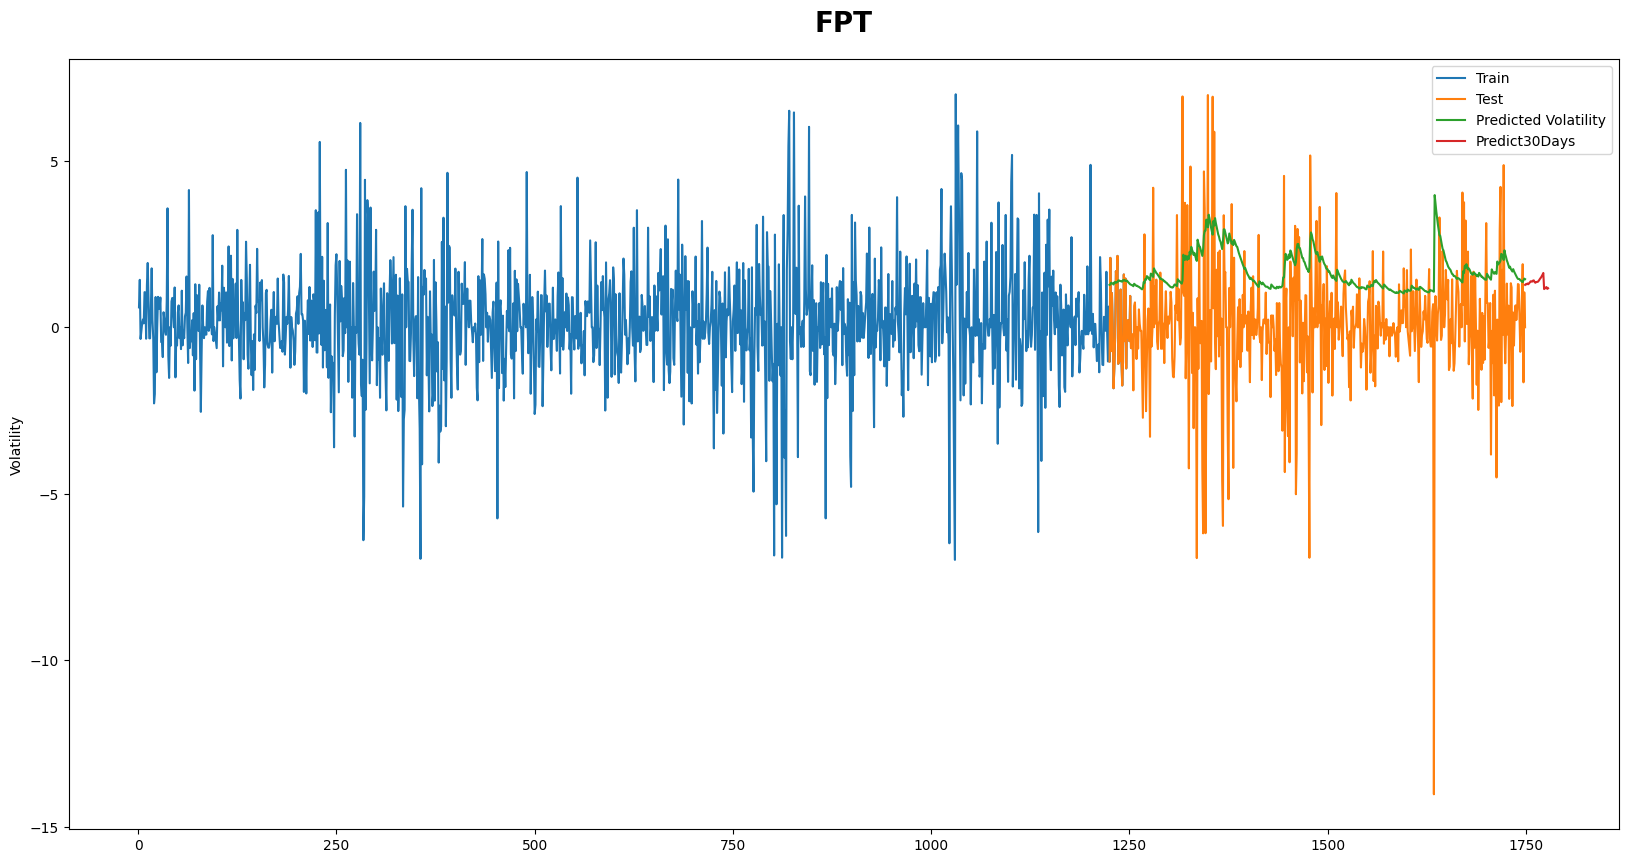

In [19]:
# Get the index from the next day onwards
index_forecasted = range(len(returns), len(returns)+ len(forecasted_next_30_days))

# Plot a chart with adjusted index values
plt.figure(figsize=(20,10 ))
train, = plt.plot(returns[:-(test_size - i)])
test, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)
forecast, = plt.plot(index_forecasted, forecasted_next_30_days)


plt.legend(['Train', 'Test', 'Predicted Volatility', 'Predict30Days'], fontsize=10)
plt.title('FPT', fontweight='bold', fontsize=20, pad=20)
plt.ylabel('Volatility')


# Show the plot
plt.show()


# **TRAIN - TEST (8-2)**

In [20]:
#1. split data into train, test sets with a ratio of 8:2
train_size = int(0.8 * len(returns))
test_size =len(returns) - train_size

train_data = returns[:train_size]

#2. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

#3. Find the best model from train
# Assuming 'returns' is your time series data

best_aic = np.inf
best_p, best_q = None, None

# Iterate through different combinations of p and q
max_p, max_q = 5, 5
for p in range(1, max_p + 1):
    for q in range(1, max_q + 1):
        model = arch_model(y_train, vol='Garch', p=p, q=q)
        model_fit = model.fit(disp='off')

        # Calculate AIC for the current model
        aic = model_fit.aic

        # Update the best model parameters if the current model has a lower AIC
        if aic < best_aic:
            best_aic = aic
            best_p, best_q = p, q

# Fit the best model to the entire dataset
final_model_fit = arch_model(y_train, vol='Garch', p=best_p, q=best_q).fit(disp='off')


# Display the best model's parameters and AIC
print("Best Model Parameters: p={}, q={}".format(best_p, best_q))
print("AIC of the Best Model: {}".format(best_aic))


Best Model Parameters: p=1, q=1
AIC of the Best Model: 5270.440587508741


In [21]:
rolling_predictions = []

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=best_p, q=best_q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

In [22]:
forecasted_next_30_days = []
for i in range(30):
    train = returns[:-(test_size+i)]
    model = arch_model(train, p=best_p, q=best_q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    forecasted_next_30_days.append(np.sqrt(pred.variance.values[-1:][0]))

In [23]:
# 4. Evaluate the accuracy of testing
test_actual_values = returns[-test_size:]
test_predicted_values = rolling_predictions[returns.index[-test_size:]]
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
# Calculate RMSE
test_rmse = np.sqrt(MSE(test_actual_values, test_predicted_values))
# Calculate MAPE for non-zero actual values
non_zero_mask = test_actual_values != 0
test_mape = np.mean(np.abs((test_actual_values[non_zero_mask] - test_predicted_values[non_zero_mask]) / test_actual_values[non_zero_mask])) * 100
# Calculate MAE
test_mae = MAE(test_actual_values, test_predicted_values)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 2.240642138509601
Testing MAPE: 347.12750533638825
Testing MAE: 1.730697428881362


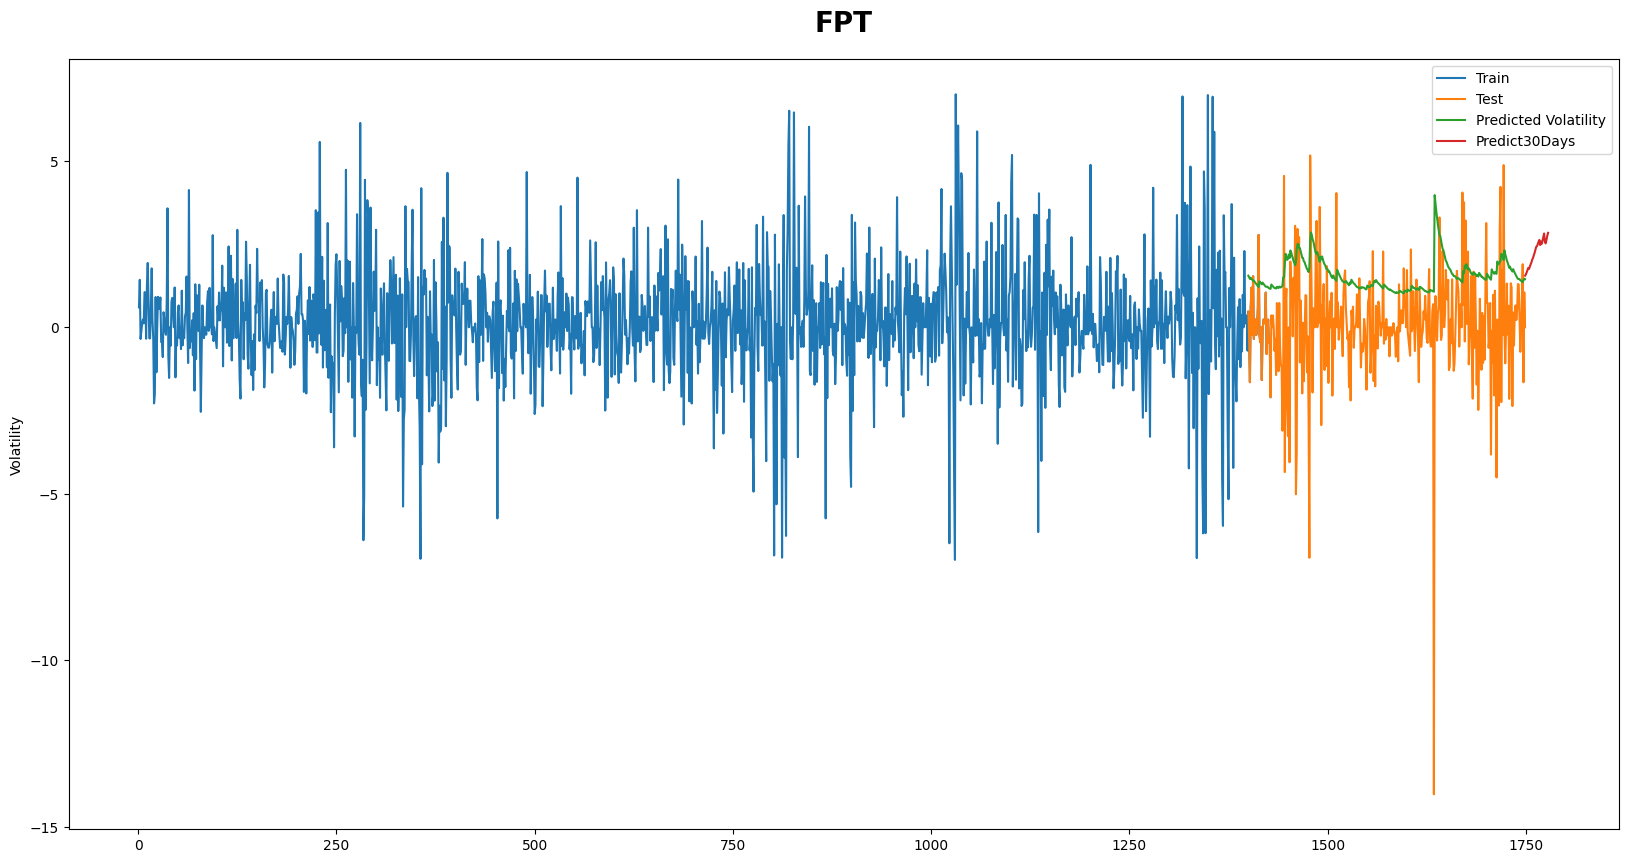

In [24]:
# Get the index from the next day onwards
index_forecasted = range(len(returns), len(returns)+ len(forecasted_next_30_days))

# Plot a chart with adjusted index values
plt.figure(figsize=(20,10 ))
train, = plt.plot(returns[:-(test_size - i)])
test, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)
forecast, = plt.plot(index_forecasted, forecasted_next_30_days)


plt.legend(['Train', 'Test', 'Predicted Volatility', 'Predict30Days'], fontsize=10)
plt.title('FPT', fontweight='bold', fontsize=20, pad=20)
plt.ylabel('Volatility')


# Show the plot
plt.show()


# **TRAIN - TEST (9-1)**

In [30]:
#1. split data into train, test sets with a ratio of 9:1
train_size = int(0.9 * len(returns))
test_size =len(returns) - train_size

train_data = returns[:train_size]

#2. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

#3. Find the best model from train
# Assuming 'returns' is your time series data

best_aic = np.inf
best_p, best_q = None, None

# Iterate through different combinations of p and q
max_p, max_q = 5, 5
for p in range(1, max_p + 1):
    for q in range(1, max_q + 1):
        model = arch_model(y_train, vol='Garch', p=p, q=q)
        model_fit = model.fit(disp='off')

        # Calculate AIC for the current model
        aic = model_fit.aic

        # Update the best model parameters if the current model has a lower AIC
        if aic < best_aic:
            best_aic = aic
            best_p, best_q = p, q

# Fit the best model to the entire dataset
final_model_fit = arch_model(y_train, vol='Garch', p=best_p, q=best_q).fit(disp='off')


# Display the best model's parameters and AIC
print("Best Model Parameters: p={}, q={}".format(best_p, best_q))
print("AIC of the Best Model: {}".format(best_aic))


Best Model Parameters: p=1, q=3
AIC of the Best Model: 5890.560209380793


In [31]:
rolling_predictions = []

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=best_p, q=best_q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

In [32]:
forecasted_next_30_days = []
for i in range(30):
    train = returns[:-(test_size+i)]
    model = arch_model(train, p=best_p, q=best_q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    forecasted_next_30_days.append(np.sqrt(pred.variance.values[-1:][0]))

In [33]:
#4. Evaluate the accuracy of testing
test_actual_values = returns[-test_size:]
test_predicted_values = rolling_predictions[returns.index[-test_size:]]
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
# Calculate RMSE
test_rmse = np.sqrt(MSE(test_actual_values, test_predicted_values))
# Calculate MAPE for non-zero actual values
non_zero_mask = test_actual_values != 0
test_mape = np.mean(np.abs((test_actual_values[non_zero_mask] - test_predicted_values[non_zero_mask]) / test_actual_values[non_zero_mask])) * 100
# Calculate MAE
test_mae = MAE(test_actual_values, test_predicted_values)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 2.2531336583576635
Testing MAPE: 379.1194753891196
Testing MAE: 1.6712650152242647


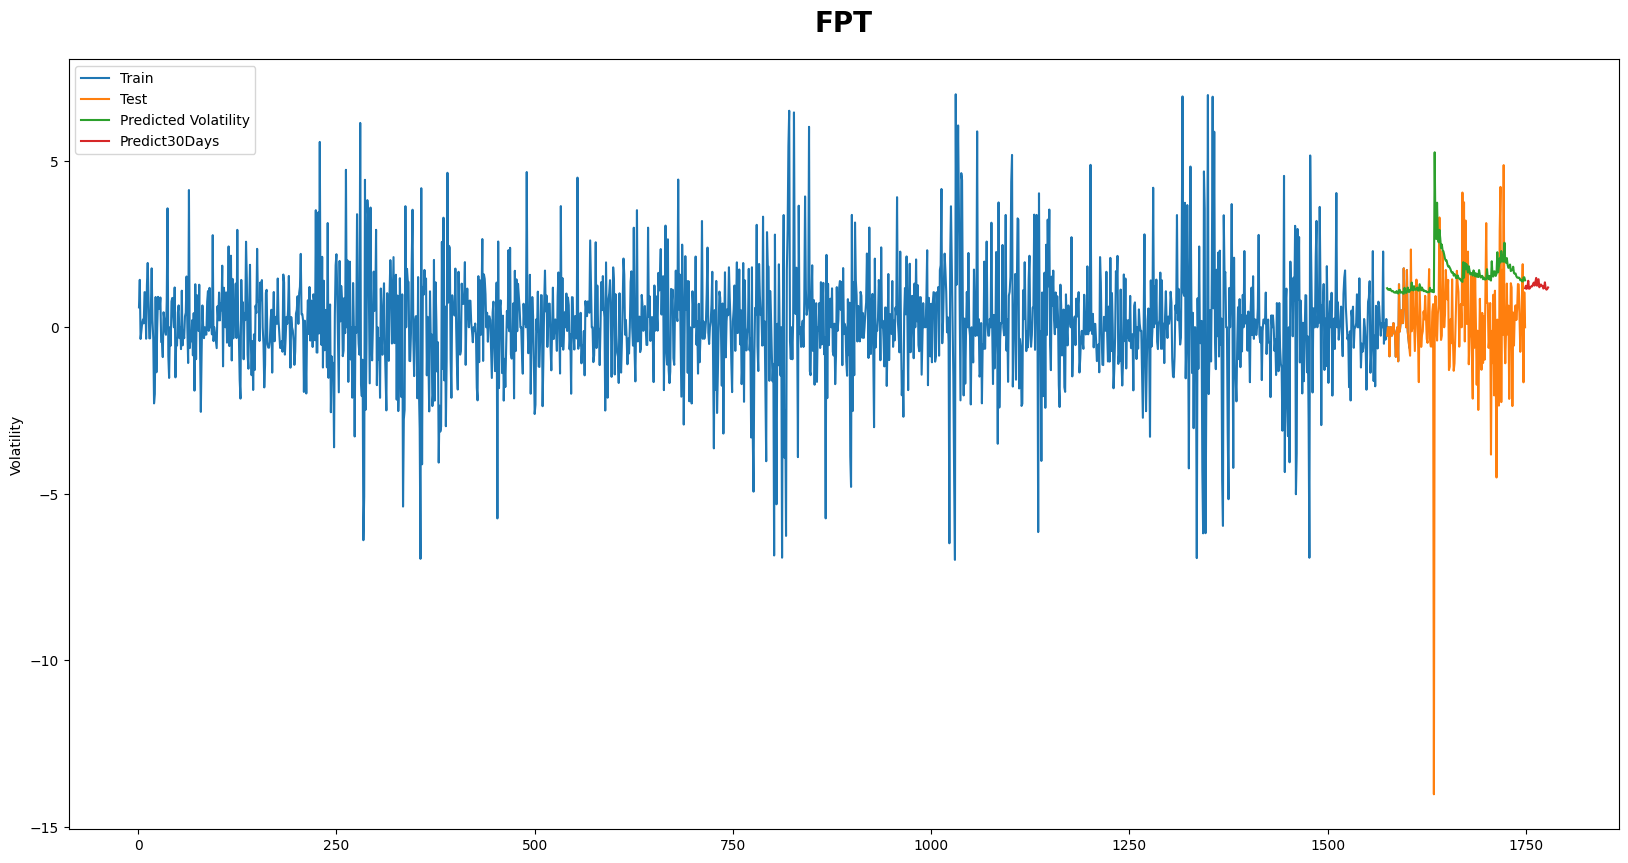

In [34]:
# Lấy index từ ngày tiếp theo trở đi
index_forecasted = range(len(returns), len(returns)+ len(forecasted_next_30_days))

# Plot a chart with adjusted index values
plt.figure(figsize=(20,10 ))
train, = plt.plot(returns[:-(test_size - i)])
test, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)
forecast, = plt.plot(index_forecasted, forecasted_next_30_days)


plt.legend(['Train', 'Test', 'Predicted Volatility', 'Predict30Days'], fontsize=10)
plt.title('FPT', fontweight='bold', fontsize=20, pad=20)
plt.ylabel('Volatility')


# Show the plot
plt.show()
